In [ ]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

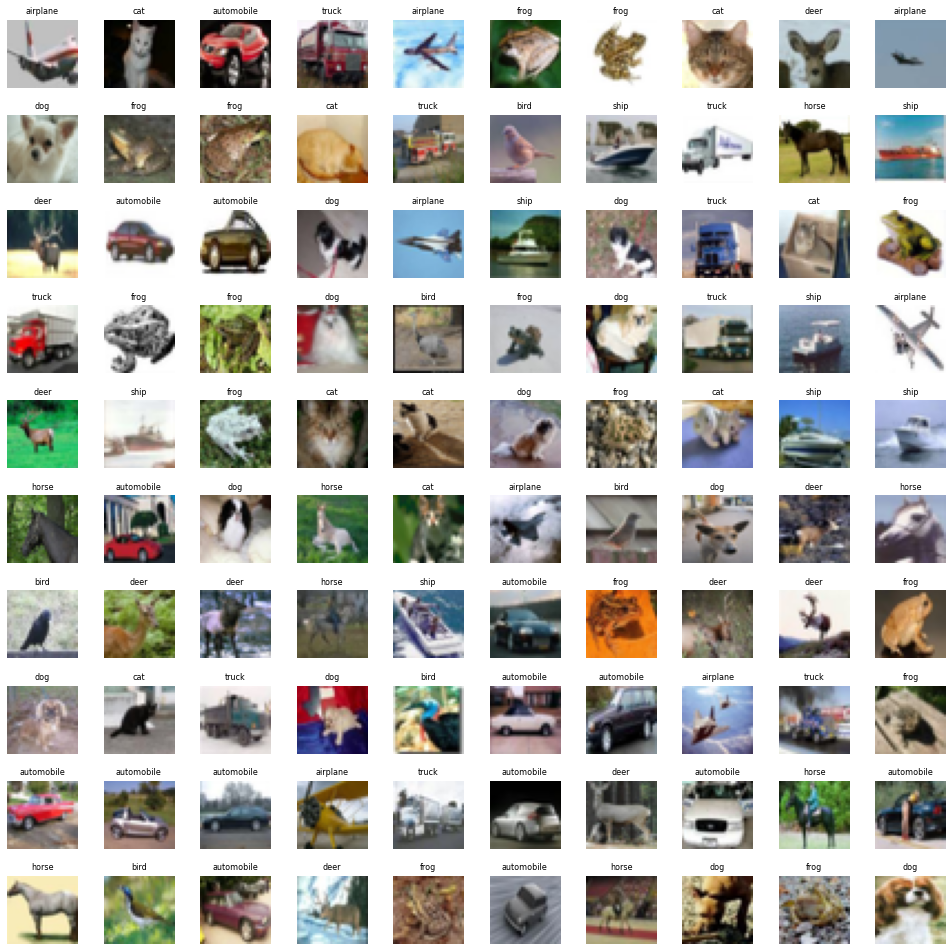

In [ ]:
fig, axes = plt.subplots(10, 10, figsize = (17,17))
axes = axes.ravel() 
n_train = len(x_train) 
for i in np.arange(0, 10 * 10): 
    index = np.random.randint(0, n_train)   
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

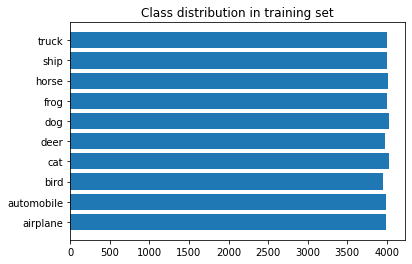

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

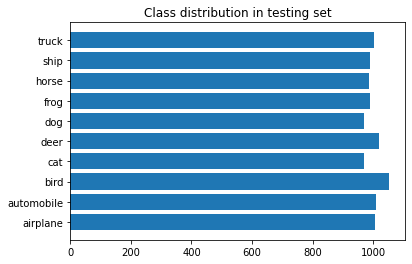

In [ ]:
classes, counts = np.unique(y_val, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in testing set')

In [ ]:
train_images = train_images.reshape((50000, 32* 32*3))
train_images = train_images.astype('float64') / 255

test_images = test_images.reshape((10000, 32* 32*3))
test_images = test_images.astype('float64') / 255


In [ ]:
train_images.shape

(50000, 3072)

In [ ]:

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
train_labels.shape

(50000, 10)

### Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32*3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='softmax', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))



In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


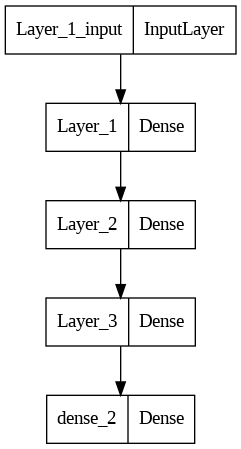

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network)

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_labels.shape

(50000, 10)

# We need the activation functions in the last layer to act as decision layer:

### Learning

In [ ]:
network.fit(train_images, train_labels, batch_size=200, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 2s 6ms/step - loss: 1.5067 - accuracy: 0.4697 - val_loss: 1.5368 - val_accuracy: 0.4657
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 1.4855 - accuracy: 0.4768 - val_loss: 1.5441 - val_accuracy: 0.4655
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 1.4633 - accuracy: 0.4849 - val_loss: 1.5250 - val_accuracy: 0.4664
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 1.4475 - accuracy: 0.4932 - val_loss: 1.5360 - val_accuracy: 0.4668
Epoch 5/10
250/250 [==============================] - 2s 6ms/step - loss: 1.4272 - accuracy: 0.5011 - val_loss: 1.5753 - val_accuracy: 0.4464
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 1.4082 - accuracy: 0.5081 - val_loss: 1.5242 - val_accuracy: 0.4694
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 1.3922 - accuracy: 0.5136 - val_loss: 1.5369 - val_accuracy: 0.4671
Epoch 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.5102 - accuracy: 0.4744


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.47440001368522644
